In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
%matplotlib inline

In [6]:
#Population values
population = {
    "Chiapas_2016-2017.csv": 5217908,
    "Colima_2016-2017.csv": 711235,
    "Guerrero_2016-2017.csv": 3533251,
    "Hidalgo_2016-2017.csv": 2858359,
    "NuevoLeon_2016-2017.csv": 5119504,
    "Oaxaca_2016-2017.csv": 3967889,
    "QuintanaRoo_2016-2017.csv": 1501562,
    "Tabasco_2016-2017.csv" : 2395272,
    "Veracruz_2016-2017.csv" : 8112505,
    "Yucatan_2016-2017.csv" : 2097175,
}

In [7]:
train_file = "../TrainTestFiles/Train-Test-0"
trainDataset = pd.read_csv("{}/Train.csv".format(train_file))
# trainOriginalDataset = trainDataset.copy()
#Preprocess data
# trainDataset["Searches"] /= 100
# for key in population:
#     trainDataset.loc[trainDataset.State==key, "Cases"] /= population[key]
# trainDataset.head

test_file = "../TrainTestFiles/Train-Test-0"
testDataset = pd.read_csv("{}/Test.csv".format(test_file))
# testOriginalDataset = testDataset.copy()

# testDataset["Searches"] /= 100
# for key in population:
#     testDataset.loc[testDataset.State==key, "Cases"] /= population[key]
    
frame = [trainDataset, testDataset]
merged = pd.concat(frame)

testIndex = 52 * 2 * 7 # Weeks per year * 2 years per state * 7 states

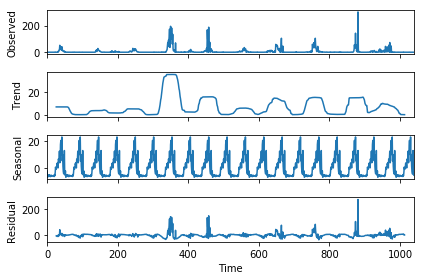

In [8]:
result = seasonal_decompose(merged["Cases"].values, model="additive", freq=52)
fig = result.plot()

In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 

E:\Aplicaciones\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
E:\Aplicaciones\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


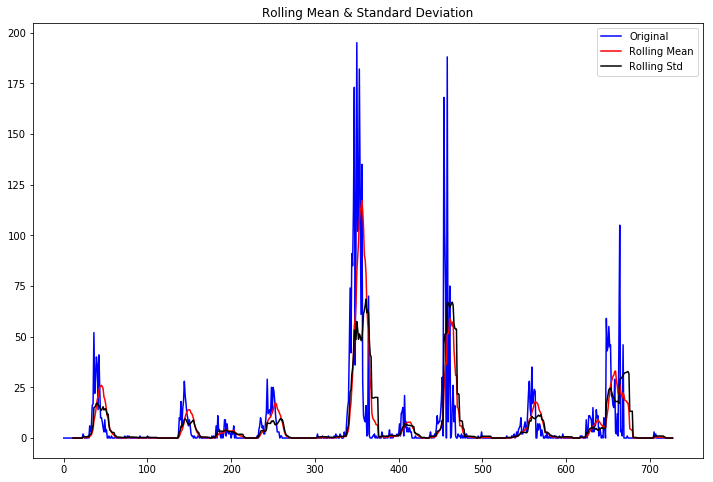

Results of Dickey-Fuller Test:
Test Statistic                -5.942288e+00
p-value                        2.246157e-07
#Lags Used                     1.200000e+01
Number of Observations Used    7.150000e+02
Critical Value (1%)           -3.439529e+00
Critical Value (5%)           -2.865591e+00
Critical Value (10%)          -2.568927e+00
dtype: float64


In [10]:
test_stationarity(trainDataset["Cases"])

E:\Aplicaciones\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
E:\Aplicaciones\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


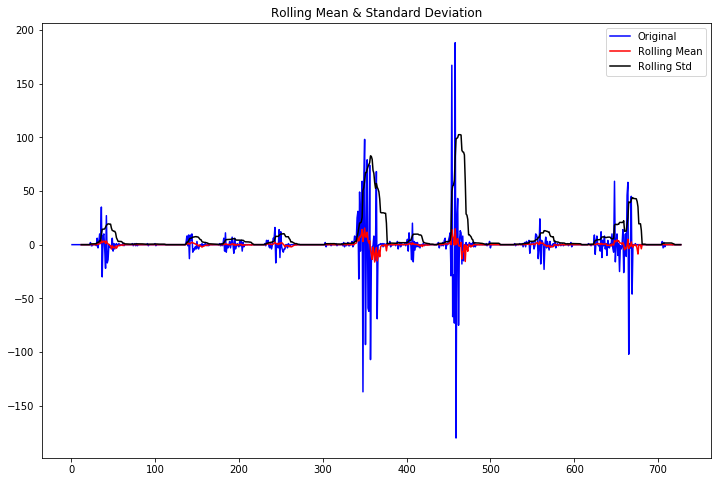

Results of Dickey-Fuller Test:
Test Statistic                -1.043224e+01
p-value                        1.599629e-18
#Lags Used                     9.000000e+00
Number of Observations Used    7.170000e+02
Critical Value (1%)           -3.439503e+00
Critical Value (5%)           -2.865579e+00
Critical Value (10%)          -2.568921e+00
dtype: float64


In [11]:
trainDataset["first_difference"] = trainDataset["Cases"] - trainDataset["Cases"].shift(1)
test_stationarity(trainDataset["first_difference"].dropna(inplace=False))

E:\Aplicaciones\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
E:\Aplicaciones\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


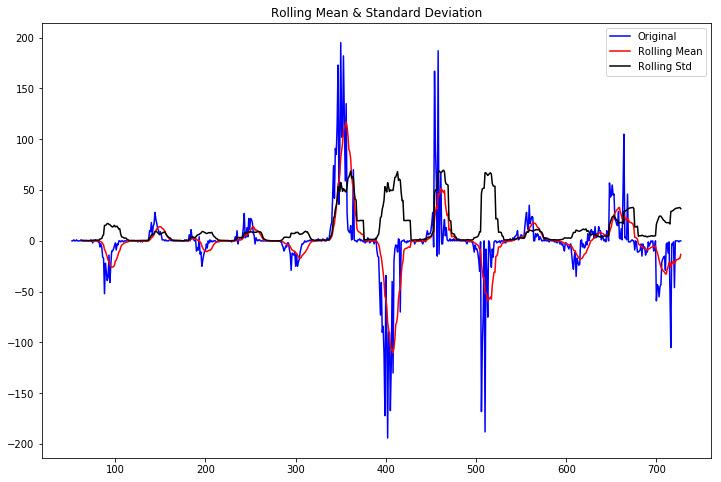

Results of Dickey-Fuller Test:
Test Statistic                  -5.596244
p-value                          0.000001
#Lags Used                       6.000000
Number of Observations Used    669.000000
Critical Value (1%)             -3.440163
Critical Value (5%)             -2.865870
Critical Value (10%)            -2.569076
dtype: float64


In [12]:
trainDataset["seasonal_difference"] = trainDataset["Cases"] - trainDataset["Cases"].shift(52)
test_stationarity(trainDataset["seasonal_difference"].dropna(inplace=False))

E:\Aplicaciones\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
E:\Aplicaciones\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


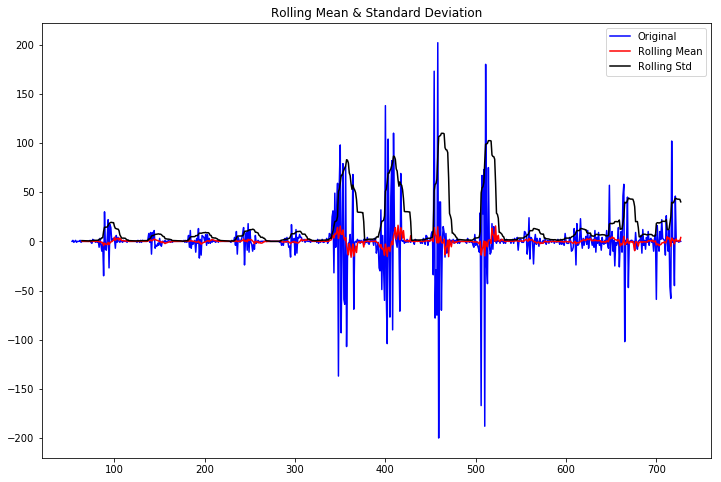

Results of Dickey-Fuller Test:
Test Statistic                -1.001489e+01
p-value                        1.739354e-17
#Lags Used                     9.000000e+00
Number of Observations Used    6.650000e+02
Critical Value (1%)           -3.440222e+00
Critical Value (5%)           -2.865896e+00
Critical Value (10%)          -2.569090e+00
dtype: float64


In [13]:
trainDataset["seasonal_first_difference"] = trainDataset["first_difference"] - trainDataset["first_difference"].shift(52)
test_stationarity(trainDataset["seasonal_first_difference"].dropna(inplace=False))

E:\Aplicaciones\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
E:\Aplicaciones\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


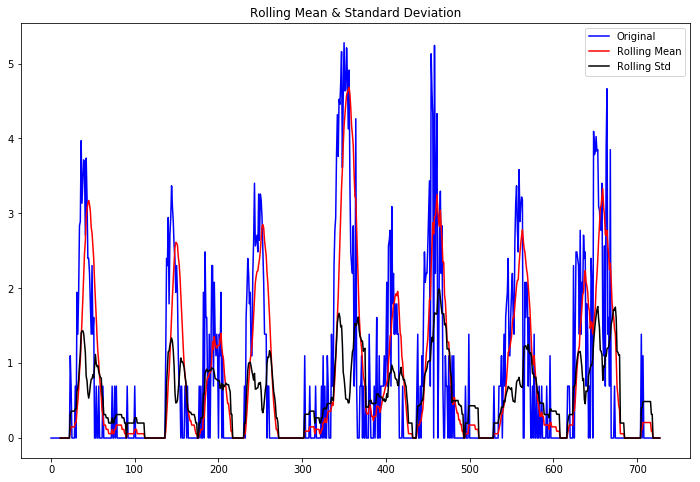

Results of Dickey-Fuller Test:
Test Statistic                  -5.621528
p-value                          0.000001
#Lags Used                      10.000000
Number of Observations Used    717.000000
Critical Value (1%)             -3.439503
Critical Value (5%)             -2.865579
Critical Value (10%)            -2.568921
dtype: float64


In [14]:
trainDataset['logCases'] = np.log(1 + trainDataset["Cases"])
test_stationarity(trainDataset["logCases"].dropna(inplace=False))

In [15]:
model = SARIMAX(merged["Cases"].values,
                exog=merged["Searches"].values,
                trend='n', order=(4,0,1), seasonal_order=(0,0,0,52))
results = model.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 1040
Model:               SARIMAX(4, 0, 1)   Log Likelihood               -4414.595
Date:                Tue, 12 Jun 2018   AIC                           8843.189
Time:                        19:17:31   BIC                           8877.818
Sample:                             0   HQIC                          8856.325
                               - 1040                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0764      0.026      2.889      0.004       0.025       0.128
ar.L1          0.0057      0.138      0.042      0.967      -0.265       0.276
ar.L2          0.2348      0.037      6.265      0.0

In [16]:
testDataset["forecast"] = results.predict(start = testIndex,
                           dynamic= True,
                           exog=merged[testIndex:]["Searches"])  

In [17]:
testDataset["naive"] = testDataset["Cases"].shift(1)

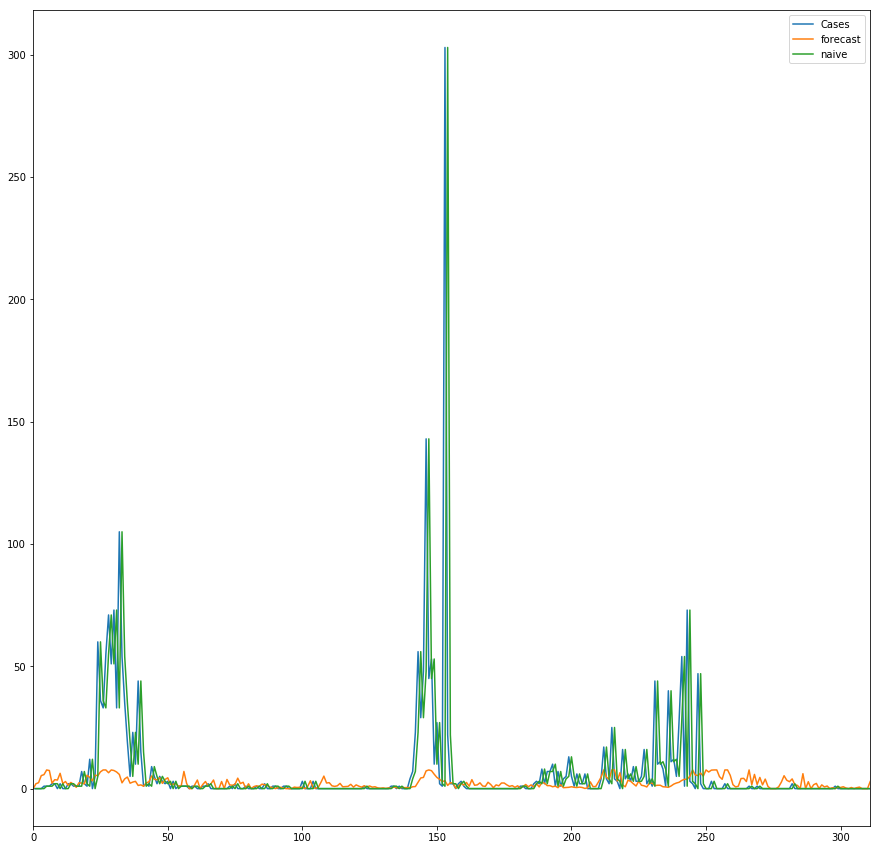

In [18]:
testDataset[["Cases", "forecast", "naive"]].plot(figsize=(15, 15))

In [19]:
testDataset.t.to_csv("TEST.csv")

NameError: name 'testDatase' is not defined

In [ ]:
cases_log = 